In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt

In [22]:
k = 50
x_min_range = 0
x_max_range = 100 + 1

# random
alpha = 0.3
slope = 2.
intercept = 1.

In [23]:
noise = np.random.normal(-alpha, alpha, k)
noise

array([-0.74979268, -0.5381325 , -0.04612784,  0.00889188, -0.14784299,
       -0.25517046,  0.13729166, -0.23655229, -0.17601087, -0.20548185,
       -0.04126472, -0.44338349, -0.34374714,  0.11544685, -0.36138791,
        0.16089576, -0.38191471, -0.14694497, -0.34156521, -0.27838995,
       -0.44777763, -0.24222273, -0.32734563, -0.28095769, -0.26024239,
       -0.12621705, -0.7086436 , -0.29680585, -0.18911174, -0.14575571,
       -0.33978971, -0.64324719, -0.49308137, -0.38256873, -0.14389136,
       -0.24036954,  0.19985048, -0.34957342, -0.86614282, -0.41604199,
       -0.55822966, -0.37506484, -0.24684339, -0.18416581, -0.41965066,
        0.03526227, -0.24276135, -0.48113853, -0.55323363, -0.02455098])

In [ ]:
X = np.random.randint(x_min_range, x_max_range, k)
X

array([97, 29, 55, 17, 74, 84, 75, 91, 16,  7, 90, 61,  2, 58,  3, 95,  8,
       80, 93, 78,  3,  3, 60, 25, 26, 67, 61,  4, 30, 62, 83,  7, 72, 86,
       27, 99, 87, 39, 76,  5, 27, 86, 76, 13, 18, 65, 27, 40,  5, 14])

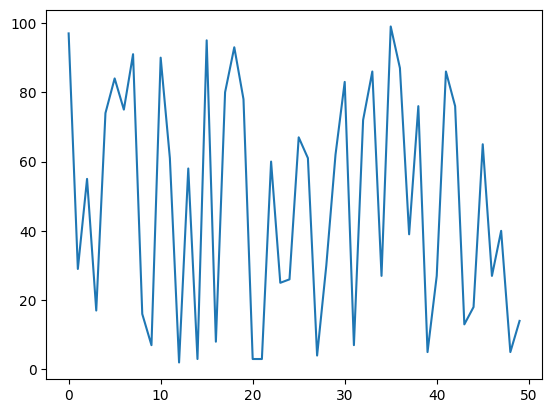

In [16]:
plt.plot(X)

In [12]:
x = np.random.uniform(x_min_range, x_max_range, k)
x

array([ 1.70723038, 63.3063603 , 89.2796291 , 90.02102234, 75.56242585,
       66.43066867, 33.78784384, 25.08817156, 48.46561789, 67.05733442,
       32.38034222, 26.73861925, 28.84827494, 37.68183475, 17.78484949,
       99.22797103, 66.1593822 , 37.15397595, 67.15265271, 65.07120015,
       27.23786424,  5.80241196, 36.32689804, 38.5009248 , 97.26118143,
       12.16907887, 30.71601208, 66.68394086, 57.70626064, 65.61563935,
        8.57869534, 61.45283826, 90.95528488, 64.84031511, 11.5460789 ,
       11.45280264, 72.89122758, 19.47409546,  1.26304647, 21.48951154,
       62.58218557, 65.3921964 , 45.10128444, 14.43660153, 50.38094285,
       62.46771183, 78.71353181, 34.84140003,  2.74713145, 28.87613572])

In [24]:
y = slope * x + intercept + noise
y

array([  3.66466808, 127.0745881 , 179.51313036, 181.05093656,
       151.97700871, 133.60616688,  68.71297934,  50.93979082,
        97.75522491, 134.90918699,  65.71941972,  54.03385502,
        58.35280273,  76.47911635,  36.20831107, 199.61683783,
       132.9368497 ,  75.16100692, 134.96374021, 130.86401034,
        55.02795085,  12.36260119,  73.32645045,  77.72089192,
       195.26212048,  25.21194068,  61.72338056, 134.07107588,
       116.22340955, 132.08552299,  17.81760097, 123.26242932,
       182.41748838, 130.29806149,  23.94826644,  23.66523573,
       146.98230564,  39.5986175 ,   2.65995012,  43.56298109,
       125.60614149, 131.40932796,  90.95572549,  29.68903725,
       101.34223504, 125.97068592, 158.18430227,  70.20166154,
         5.94102926,  58.72772045])

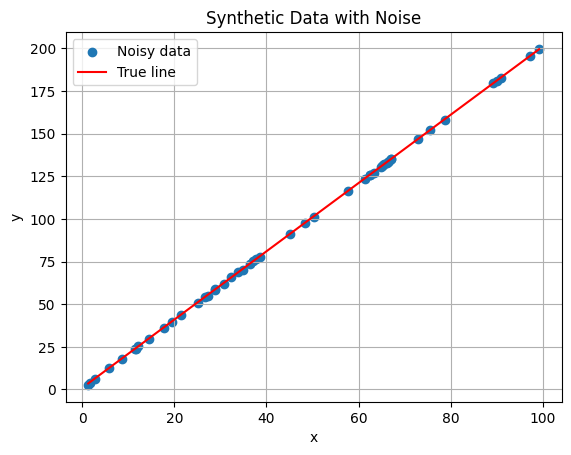

In [25]:
plt.scatter(x, y, label='Noisy data')
plt.plot(np.sort(x), slope * np.sort(x) + intercept, color='red', label='True line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data with Noise')
plt.legend()
plt.grid(True)

In [62]:
def calculate_linear_regression_params(num_iterations, num_samples, learning_rate = 0.01, tolerance=1e-6):
    loss_history = []
    slope = 2.
    intercept = 1.
    for i in range(num_iterations):
        y_pred = slope * x + intercept
        error = y - y_pred
        loss = (1 / (2 * num_samples)) * np.sum(error**2)
        loss_history.append(loss)

        # gradiant
        grad_m = (-1 / num_samples) * np.sum(error * x)
        grad_b = (-1 / num_samples) * np.sum(error)

        # updateing parameters 
        slope -= learning_rate * grad_m
        intercept -= learning_rate * grad_b

        # check the stop condition
        if np.abs(learning_rate * grad_m) < tolerance and np.abs(learning_rate * grad_b) < tolerance:
            print(f"Stopped at iteration {i}")
            break
    return loss_history

In [63]:
result = calculate_linear_regression_params(100, k)
rounded = [np.round(x) for x in result]
rounded

[np.float64(0.0),
 np.float64(16.0),
 np.float64(11728.0),
 np.float64(8756688.0),
 np.float64(6538328535.0),
 np.float64(4881953326236.0),
 np.float64(3645192827247925.0),
 np.float64(2.721744732054597e+18),
 np.float64(2.0322366298684454e+21),
 np.float64(1.5174037708750892e+24),
 np.float64(1.132995129614897e+27),
 np.float64(8.459699312535506e+29),
 np.float64(6.316577237436054e+32),
 np.float64(4.71637897784063e+35),
 np.float64(3.521563946180152e+38),
 np.float64(2.6294351419388782e+41),
 np.float64(1.963312116811818e+44),
 np.float64(1.4659401201954807e+47),
 np.float64(1.0945689264570043e+50),
 np.float64(8.172783582766512e+52),
 np.float64(6.10234676649772e+55),
 np.float64(4.556420181871473e+58),
 np.float64(3.4021280120862214e+61),
 np.float64(2.5402562864313632e+64),
 np.float64(1.8967252195772237e+67),
 np.float64(1.4162218898134286e+70),
 np.float64(1.0574459708158361e+73),
 np.float64(7.895598770486144e+75),
 np.float64(5.895382049298049e+78),
 np.float64(4.4018864835308

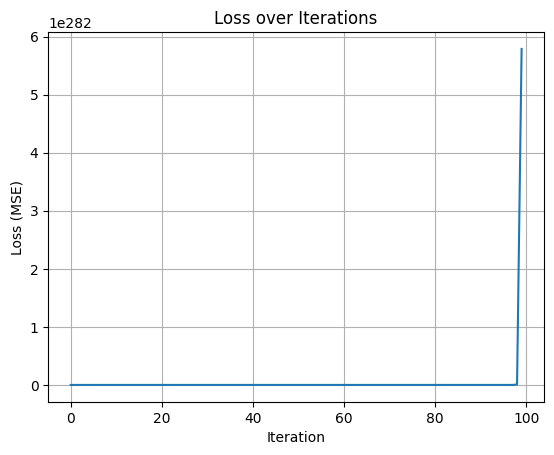

In [64]:
plt.plot(rounded)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss over Iterations')
plt.grid(True)


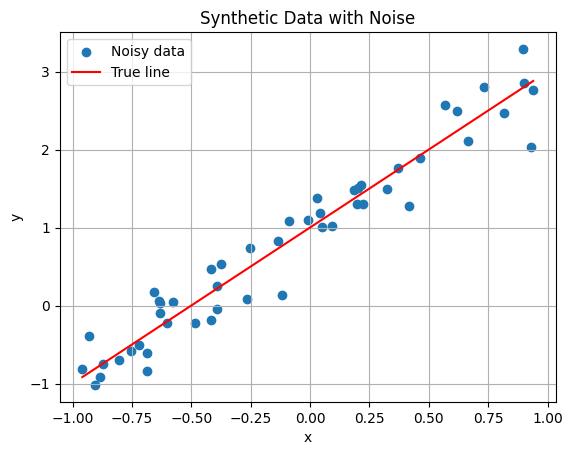

Iteration 0, Loss: 0.978879
Iteration 100, Loss: 0.442229
Iteration 200, Loss: 0.239934
Iteration 300, Loss: 0.143999
Iteration 400, Loss: 0.094957
Iteration 500, Loss: 0.069378
Iteration 600, Loss: 0.055970
Iteration 700, Loss: 0.048933
Iteration 800, Loss: 0.045238
Iteration 900, Loss: 0.043298

✅ Estimated m: 1.8820, Estimated b: 0.9820
🎯 True m: 2.0, True b: 1.0


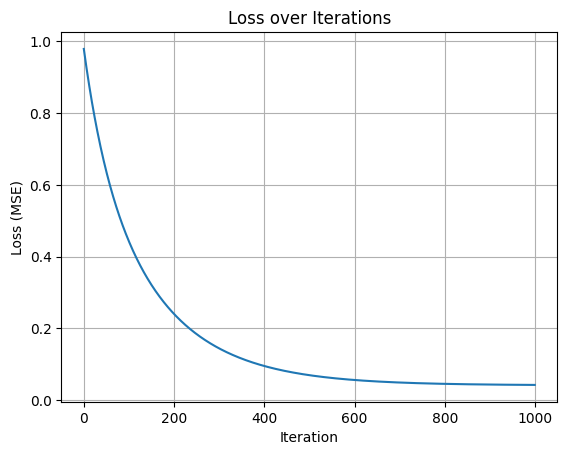

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# --- تولید داده ---
np.random.seed(42)  # برای تکرارپذیری

true_m = 2.0
true_b = 1.0
a = 0.1  # واریانس نویز
noise_std = np.sqrt(a)
K = 50  # تعداد نمونه‌ها

x = np.random.uniform(-1, 1, K)
noise = np.random.normal(0, noise_std, K)
y = true_m * x + true_b + noise

# رسم داده‌ها
plt.scatter(x, y, label='Noisy data')
plt.plot(np.sort(x), true_m * np.sort(x) + true_b, color='red', label='True line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data with Noise')
plt.legend()
plt.grid(True)
plt.show()

# --- الگوریتم گرادیان نزولی ---
m = 0.0
b = 0.0
learning_rate = 0.01
num_iterations = 1000
tolerance = 1e-6

loss_history = []

for i in range(num_iterations):
    y_pred = m * x + b
    error = y - y_pred
    loss = (1 / (2 * K)) * np.sum(error**2)
    loss_history.append(loss)

    # گرادیان‌ها
    grad_m = (-1 / K) * np.sum(error * x)
    grad_b = (-1 / K) * np.sum(error)

    # آپدیت پارامترها
    m -= learning_rate * grad_m
    b -= learning_rate * grad_b

    # نمایش وضعیت
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.6f}")

    if np.abs(learning_rate * grad_m) < tolerance and np.abs(learning_rate * grad_b) < tolerance:
        print(f"Stopped at iteration {i} due to tolerance.")
        break

print(f"\n✅ Estimated m: {m:.4f}, Estimated b: {b:.4f}")
print(f"🎯 True m: {true_m}, True b: {true_b}")

# --- نمودار روند کاهش خطا ---
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()


Noise a=0.1
Estimated m = 1.8820, b = 0.9820
Noise a=0.3
Estimated m = 1.8572, b = 0.9787
Noise a=0.5
Estimated m = 1.8401, b = 0.9765


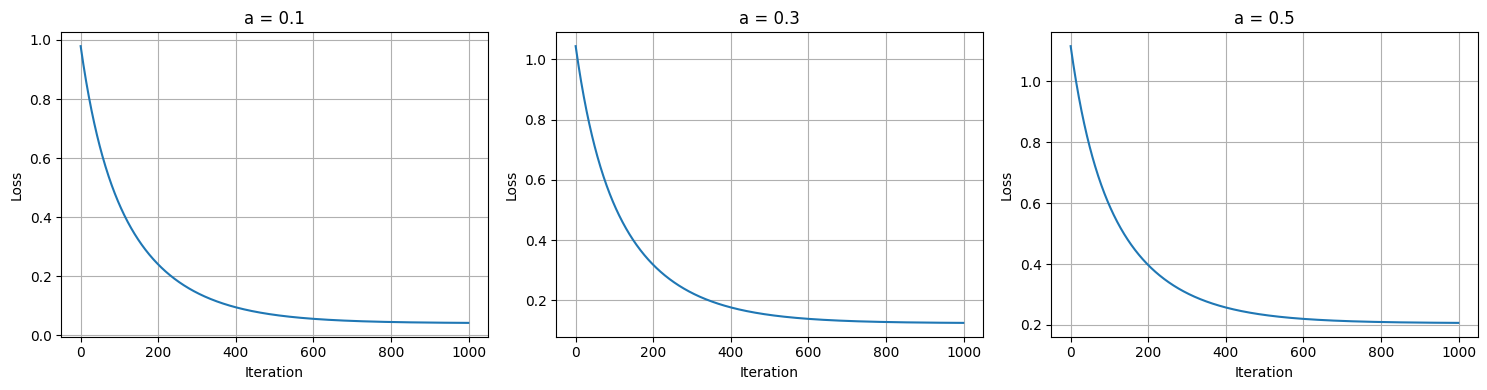

In [66]:
def generate_data(a, K=50):
    noise_std = np.sqrt(a)
    x = np.random.uniform(-1, 1, K)
    noise = np.random.normal(0, noise_std, K)
    y = true_m * x + true_b + noise
    return x, y

def gradient_descent(x, y, lr=0.01, num_iter=1000, tol=1e-6):
    K = len(x)
    m, b = 0.0, 0.0
    loss_history = []
    for i in range(num_iter):
        y_pred = m * x + b
        error = y - y_pred
        loss = (1 / (2 * K)) * np.sum(error**2)
        loss_history.append(loss)

        grad_m = (-1 / K) * np.sum(error * x)
        grad_b = (-1 / K) * np.sum(error)

        m -= lr * grad_m
        b -= lr * grad_b

        if np.abs(lr * grad_m) < tol and np.abs(lr * grad_b) < tol:
            break

    return m, b, loss_history

# پارامترهای واقعی
true_m, true_b = 2.0, 1.0
noise_levels = [0.1, 0.3, 0.5]

plt.figure(figsize=(15, 4))
for i, a in enumerate(noise_levels):
    np.random.seed(42)  # برای مقایسه منصفانه
    x, y = generate_data(a)
    m_hat, b_hat, losses = gradient_descent(x, y)
    
    print(f"Noise a={a}")
    print(f"Estimated m = {m_hat:.4f}, b = {b_hat:.4f}")
    
    plt.subplot(1, 3, i+1)
    plt.plot(losses)
    plt.title(f"a = {a}")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)

plt.tight_layout()
plt.show()

K = 10
Estimated m = 2.1785, b = 0.8198
K = 50
Estimated m = 1.8820, b = 0.9820
K = 200
Estimated m = 1.9239, b = 1.0178


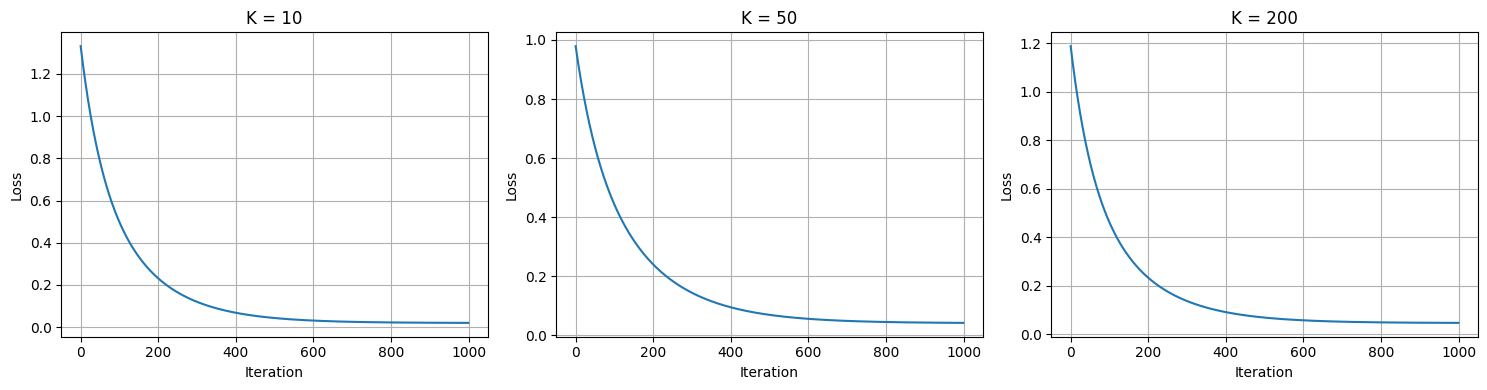

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(a, K):
    noise_std = np.sqrt(a)
    x = np.random.uniform(-1, 1, K)
    noise = np.random.normal(0, noise_std, K)
    y = true_m * x + true_b + noise
    return x, y

def gradient_descent(x, y, lr=0.01, num_iter=1000, tol=1e-6):
    K = len(x)
    m, b = 0.0, 0.0
    loss_history = []
    for i in range(num_iter):
        y_pred = m * x + b
        error = y - y_pred
        loss = (1 / (2 * K)) * np.sum(error**2)
        loss_history.append(loss)

        grad_m = (-1 / K) * np.sum(error * x)
        grad_b = (-1 / K) * np.sum(error)

        m -= lr * grad_m
        b -= lr * grad_b

        if np.abs(lr * grad_m) < tol and np.abs(lr * grad_b) < tol:
            break

    return m, b, loss_history

# پارامترهای اصلی
true_m, true_b = 2.0, 1.0
a = 0.1  # نویز ثابت
sample_sizes = [10, 50, 200]

plt.figure(figsize=(15, 4))
for i, K in enumerate(sample_sizes):
    np.random.seed(42)
    x, y = generate_data(a, K)
    m_hat, b_hat, losses = gradient_descent(x, y)

    print(f"K = {K}")
    print(f"Estimated m = {m_hat:.4f}, b = {b_hat:.4f}")

    plt.subplot(1, 3, i+1)
    plt.plot(losses)
    plt.title(f"K = {K}")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)

plt.tight_layout()
plt.show()


Learning Rate = 0.001
Estimated m = 0.5018, b = 0.5155
Learning Rate = 0.01
Estimated m = 1.8820, b = 0.9820
Learning Rate = 0.1
Estimated m = 1.9646, b = 0.9952


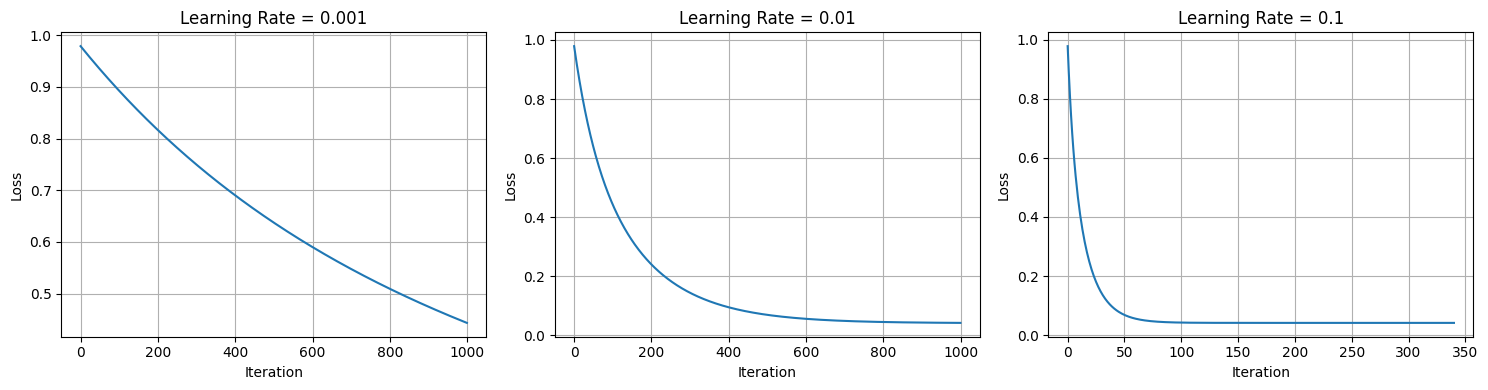

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(a, K):
    noise_std = np.sqrt(a)
    x = np.random.uniform(-1, 1, K)
    noise = np.random.normal(0, noise_std, K)
    y = true_m * x + true_b + noise
    return x, y

def gradient_descent(x, y, lr=0.01, num_iter=1000, tol=1e-6):
    K = len(x)
    m, b = 0.0, 0.0
    loss_history = []
    for i in range(num_iter):
        y_pred = m * x + b
        error = y - y_pred
        loss = (1 / (2 * K)) * np.sum(error**2)
        loss_history.append(loss)

        grad_m = (-1 / K) * np.sum(error * x)
        grad_b = (-1 / K) * np.sum(error)

        m -= lr * grad_m
        b -= lr * grad_b

        if np.abs(lr * grad_m) < tol and np.abs(lr * grad_b) < tol:
            break

    return m, b, loss_history

# ثابت‌ها
true_m, true_b = 2.0, 1.0
a = 0.1
K = 50
learning_rates = [0.001, 0.01, 0.1]

# تولید داده ثابت
np.random.seed(42)
x, y = generate_data(a, K)

plt.figure(figsize=(15, 4))
for i, lr in enumerate(learning_rates):
    m_hat, b_hat, losses = gradient_descent(x, y, lr=lr)

    print(f"Learning Rate = {lr}")
    print(f"Estimated m = {m_hat:.4f}, b = {b_hat:.4f}")

    plt.subplot(1, 3, i+1)
    plt.plot(losses)
    plt.title(f"Learning Rate = {lr}")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [69]:
import numpy as np

def generate_data(a, K):
    noise_std = np.sqrt(a)
    x = np.random.uniform(-1, 1, K)
    noise = np.random.normal(0, noise_std, K)
    y = true_m * x + true_b + noise
    return x, y

def gradient_descent(x, y, lr=0.01, num_iter=1000, tol=1e-6):
    K = len(x)
    m, b = 0.0, 0.0
    for _ in range(num_iter):
        y_pred = m * x + b
        error = y - y_pred
        grad_m = (-1 / K) * np.sum(error * x)
        grad_b = (-1 / K) * np.sum(error)
        m -= lr * grad_m
        b -= lr * grad_b
        if np.abs(lr * grad_m) < tol and np.abs(lr * grad_b) < tol:
            break
    return m, b

def closed_form_solution(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    m = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
    b = y_mean - m * x_mean
    return m, b

# تنظیمات
true_m, true_b = 2.0, 1.0
a = 0.1
K = 50
np.random.seed(42)

x, y = generate_data(a, K)
m_gd, b_gd = gradient_descent(x, y)
m_closed, b_closed = closed_form_solution(x, y)

print(f"🔧 Gradient Descent: m = {m_gd:.4f}, b = {b_gd:.4f}")
print(f"📐 Closed Form     : m = {m_closed:.4f}, b = {b_closed:.4f}")
print(f"🎯 True Values     : m = {true_m}, b = {true_b}")


🔧 Gradient Descent: m = 1.8820, b = 0.9820
📐 Closed Form     : m = 1.9647, b = 0.9952
🎯 True Values     : m = 2.0, b = 1.0
